In [1]:
#Import packages

# Data Manipulation 
import numpy as np #array processing for #s, strings, records and objects
import pandas as pd #data structures + data analysis tool

# Visualization 
import matplotlib.pyplot as plt #plotting library for Py
import missingno #visualize missing patterns in data
import seaborn as sns #statistical DV, draws graphs
from pandas.plotting import scatter_matrix #draws matrix of scatter plots
from pandas.plotting import table                #scatter plots are generally used to
                                                 #analyze 2 variables in a dataset

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

In [2]:
#Objective of Heart Disease Project: Determine the biggest factors in 
#heart disease patients and 

df = pd.read_csv("../data/heartDiseaseUCI.csv")

In [3]:
# visualize # columns
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
del df['target']

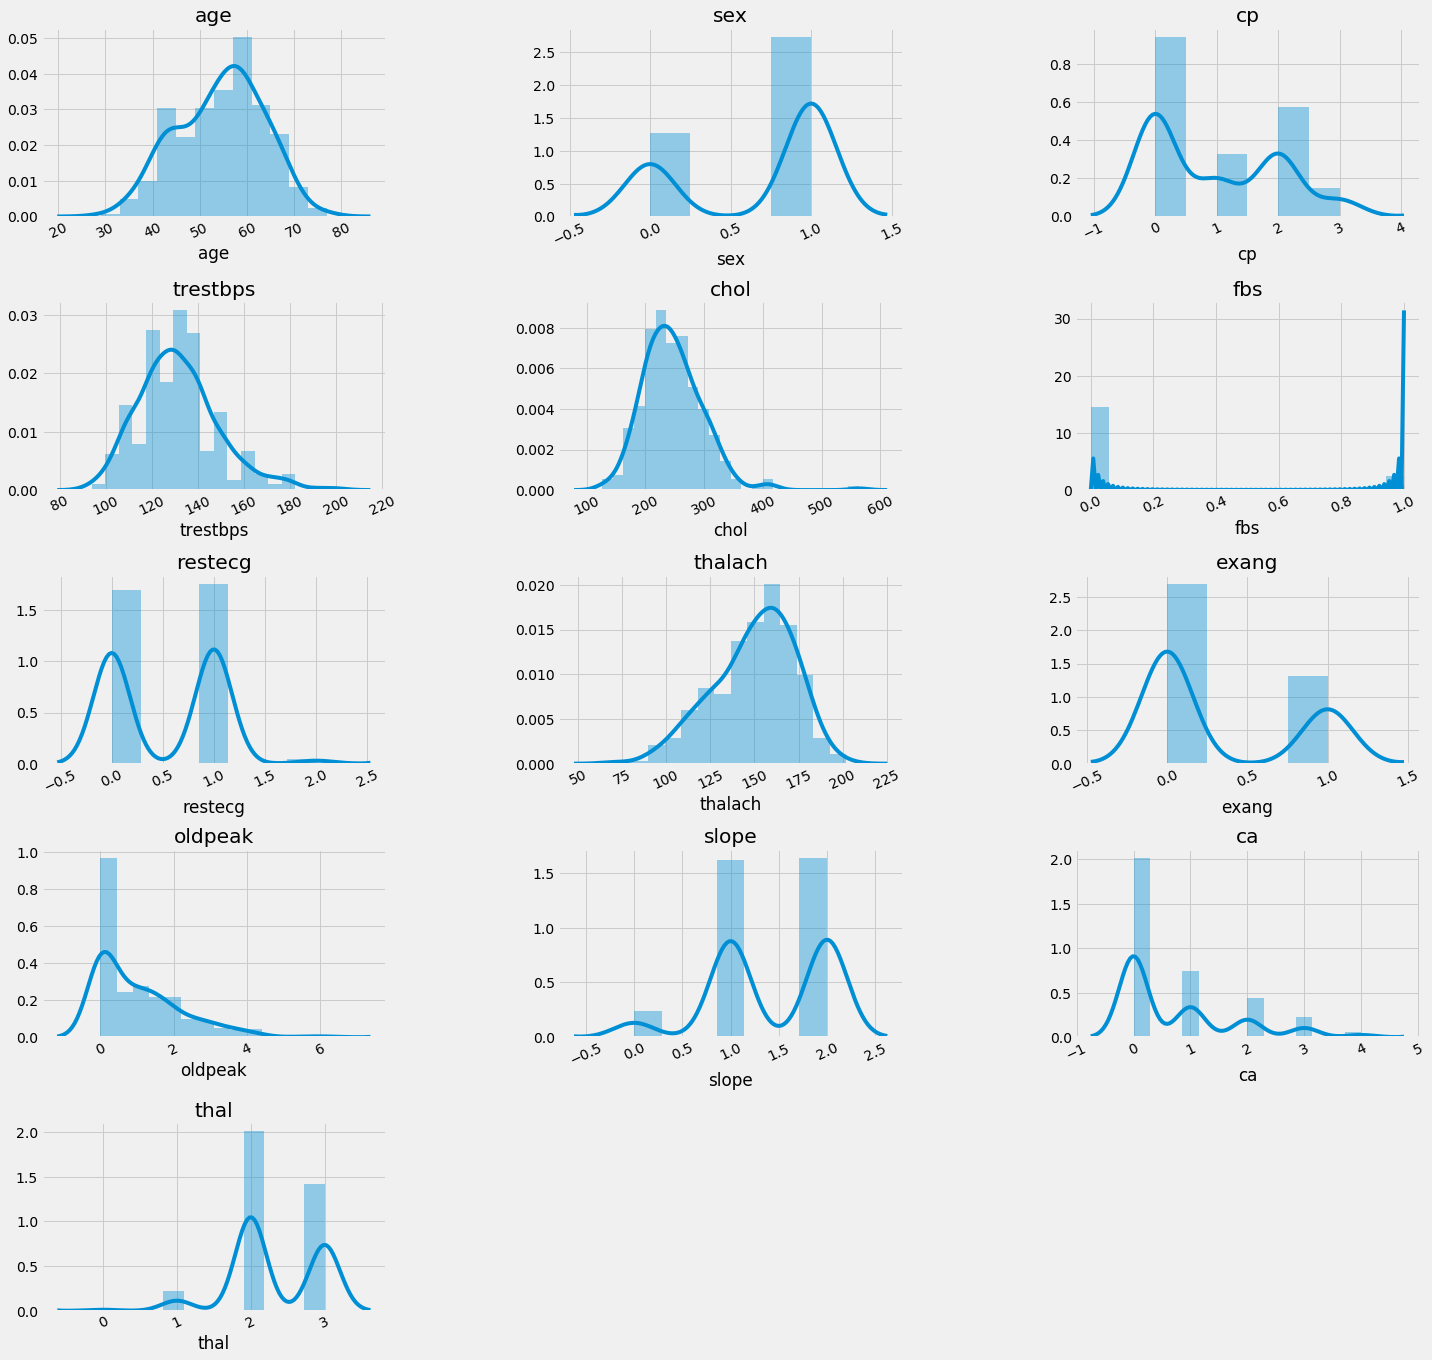

In [6]:
# Let’s plot the distribution of each feature
import math
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(22,22))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=.45)
rows = math.ceil(float(df.shape[1]) / 3)
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, 3, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        g = sns.countplot(y=column, data=df)
        substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
        g.set(yticklabels=substrings)
        plt.xticks(rotation=25)
    else:
        g = sns.distplot(df[column])
        plt.xticks(rotation=25)

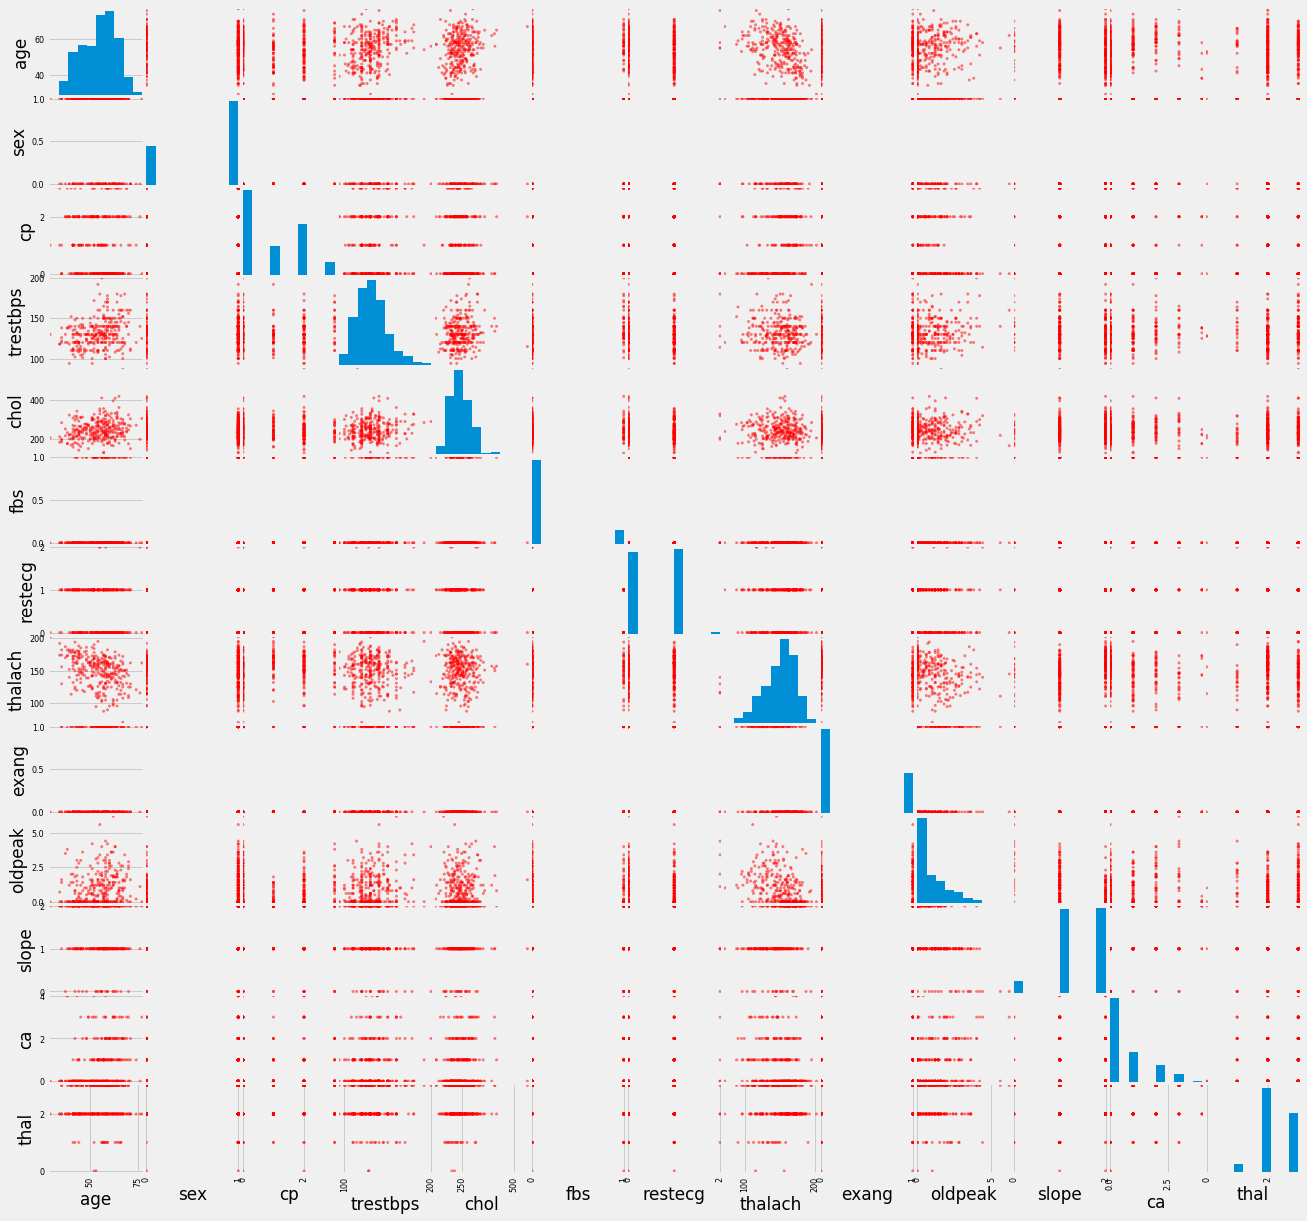

In [7]:
# Create a scatter plot matrix
# Scatter plot matrix is used to determine relationships
# between variables

scatter_matrix(df, figsize = (20,20),  color = 'red')
plt.show()

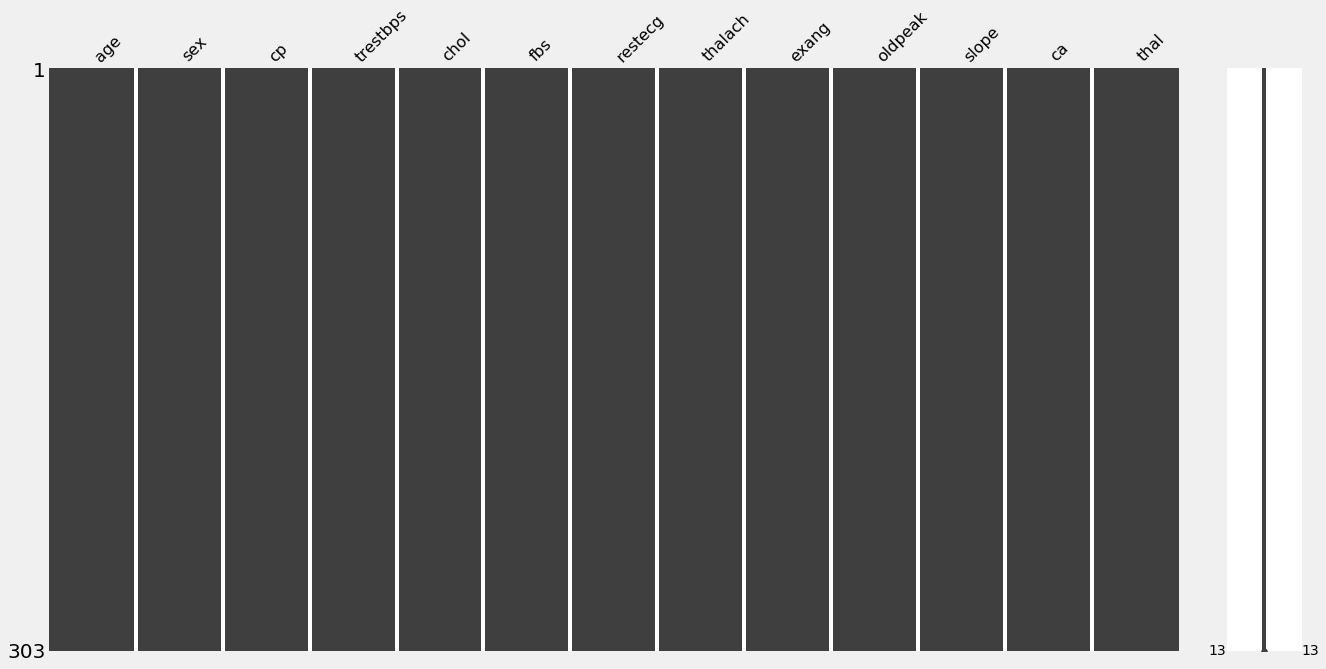

In [8]:
# Determine what is missing from data

missingno.matrix(df, figsize = (20, 10))

In [9]:
df.corr().round(decimals =2).style.background_gradient(cmap = 'PuRd')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1,-0.1,-0.07,0.28,0.21,0.12,-0.12,-0.4,0.1,0.21,-0.17,0.28,0.07
sex,-0.1,1,-0.05,-0.06,-0.2,0.05,-0.06,-0.04,0.14,0.1,-0.03,0.12,0.21
cp,-0.07,-0.05,1,0.05,-0.08,0.09,0.04,0.3,-0.39,-0.15,0.12,-0.18,-0.16
trestbps,0.28,-0.06,0.05,1,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.1,0.06
chol,0.21,-0.2,-0.08,0.12,1,0.01,-0.15,-0.01,0.07,0.05,-0,0.07,0.1
fbs,0.12,0.05,0.09,0.18,0.01,1,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1,0.04,-0.07,-0.06,0.09,-0.07,-0.01
thalach,-0.4,-0.04,0.3,-0.05,-0.01,-0.01,0.04,1,-0.38,-0.34,0.39,-0.21,-0.1
exang,0.1,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1,0.29,-0.26,0.12,0.21
oldpeak,0.21,0.1,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1,-0.58,0.22,0.21


In [10]:
df.columns
df.shape

(303, 13)

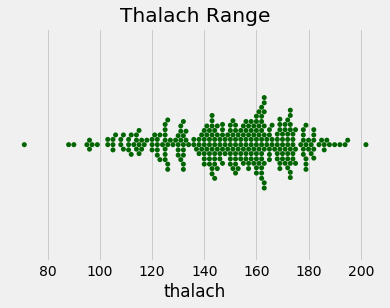

In [11]:
sns.swarmplot(x=df.thalach, color = 'darkgreen')
plt.title('Thalach Range')
plt.show()

In [12]:
import plotly_express as px
px.scatter_matrix(df, dimensions = ['age', 'sex', 'cp', 
                                    'trestbps', 'chol', 'fbs', 'restecg', 
                                    'thalach', 'exang', 'oldpeak', 'slope',
                                    'ca', 'thal'], color = "thalach",
                                    height=1500, width=1500)